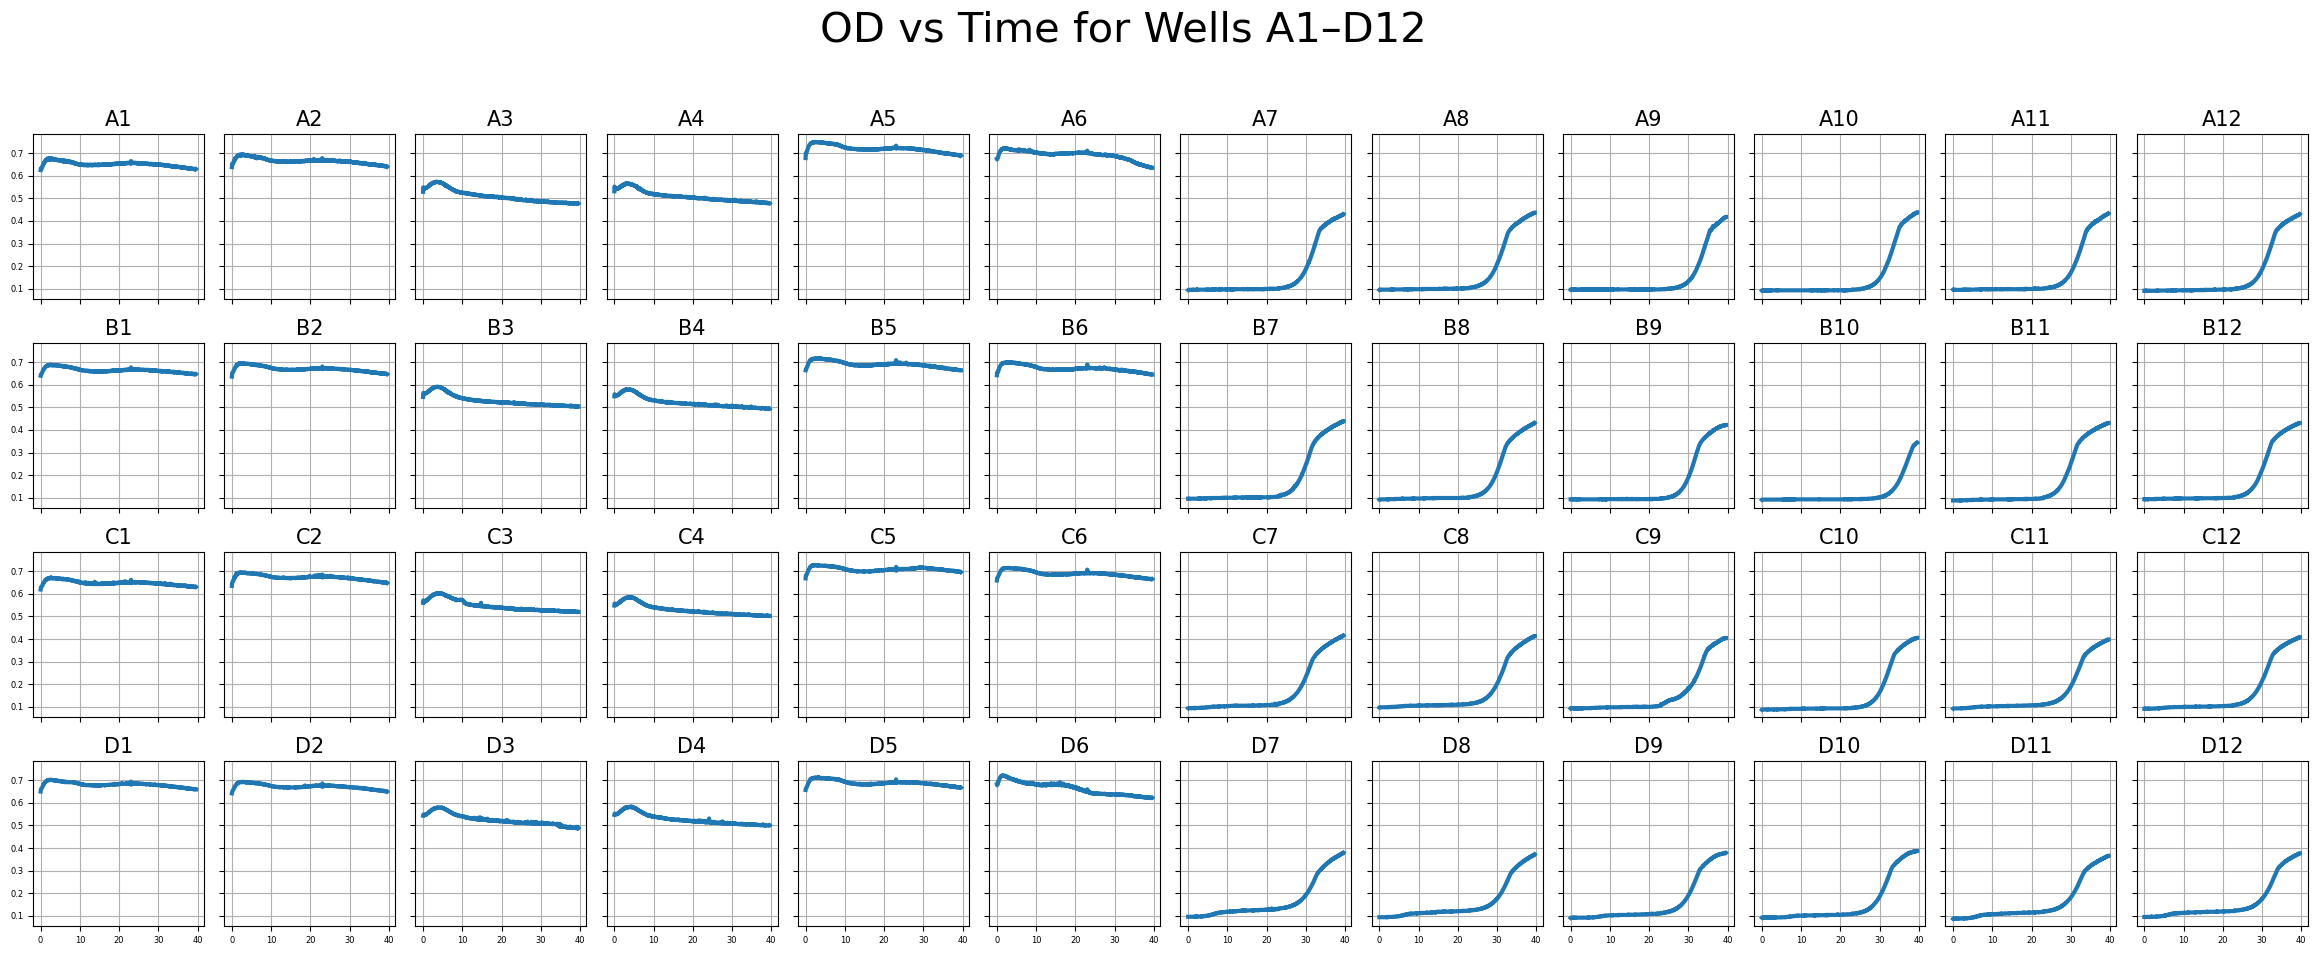

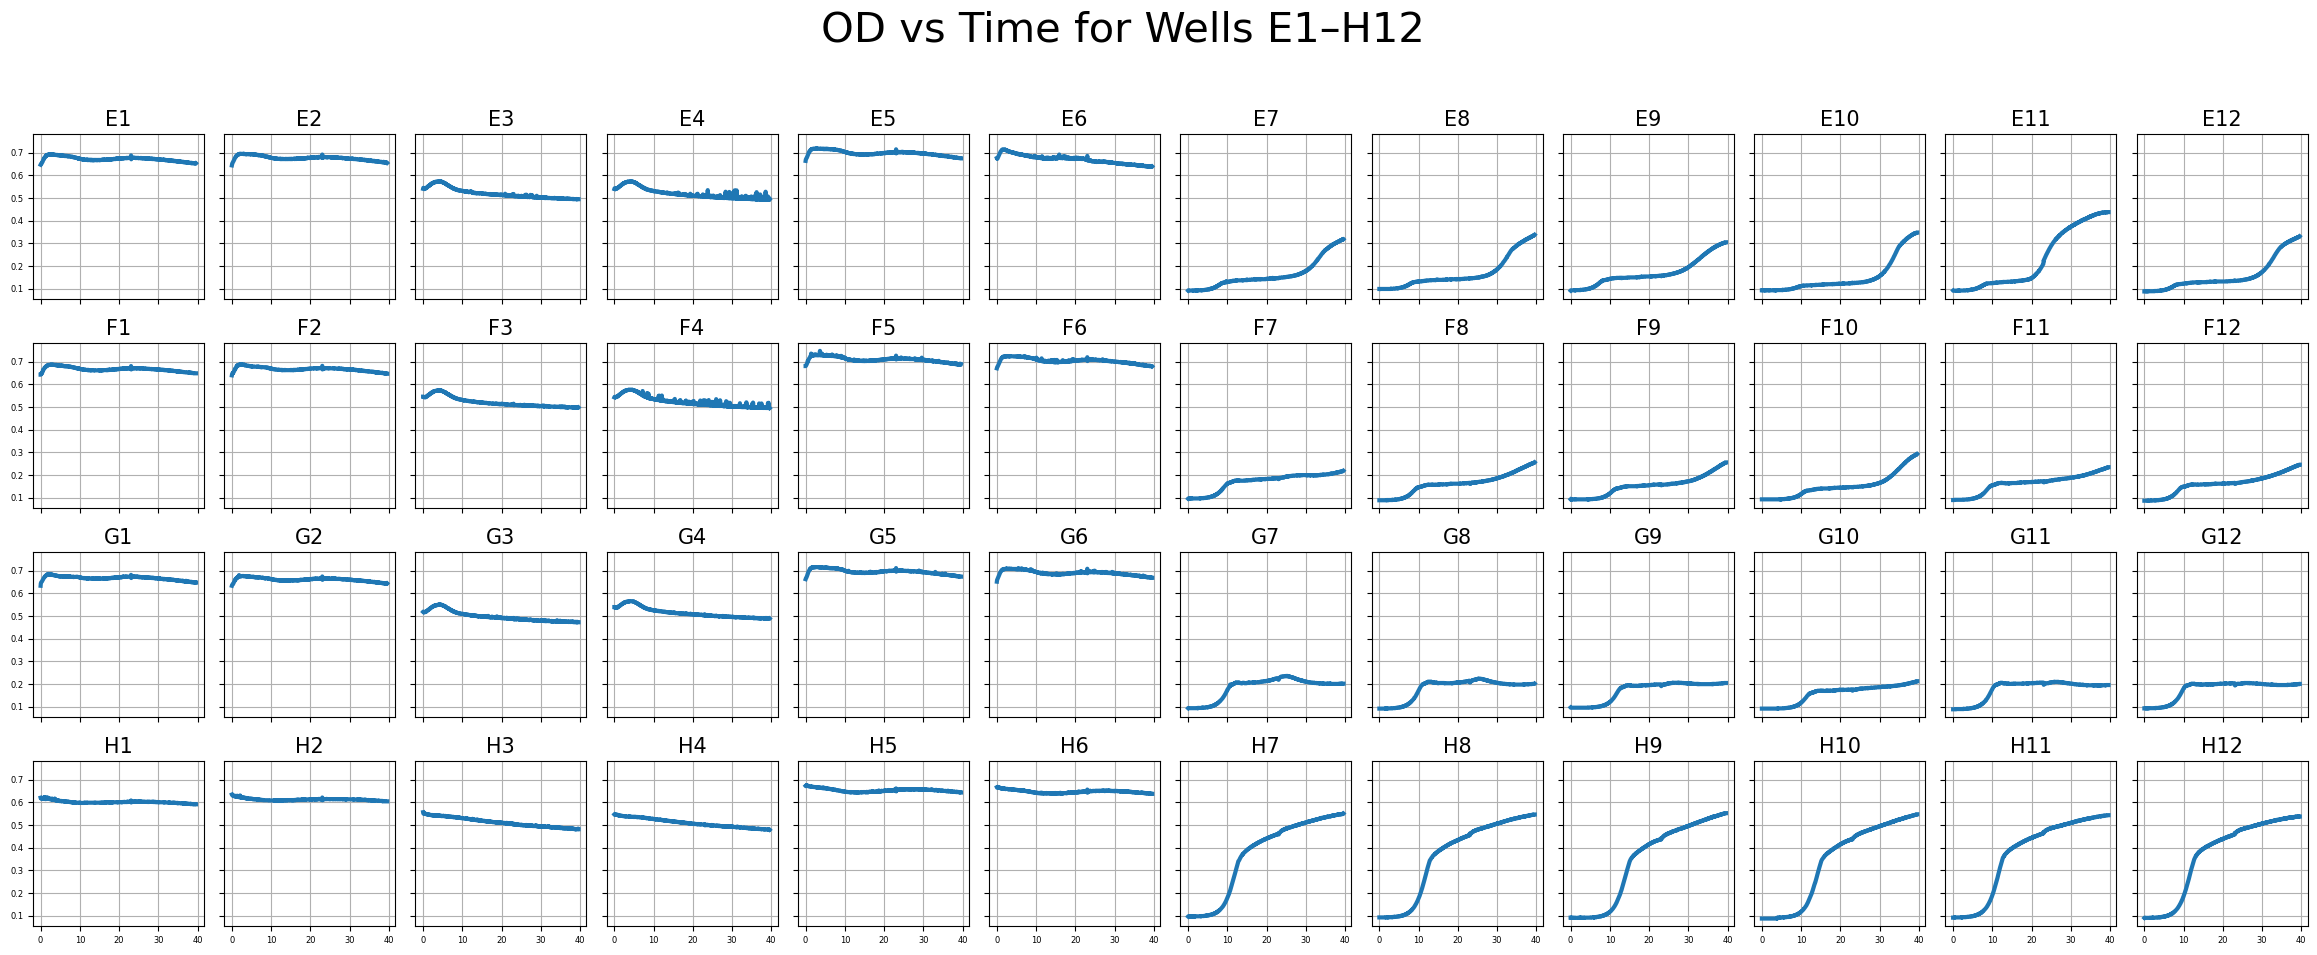

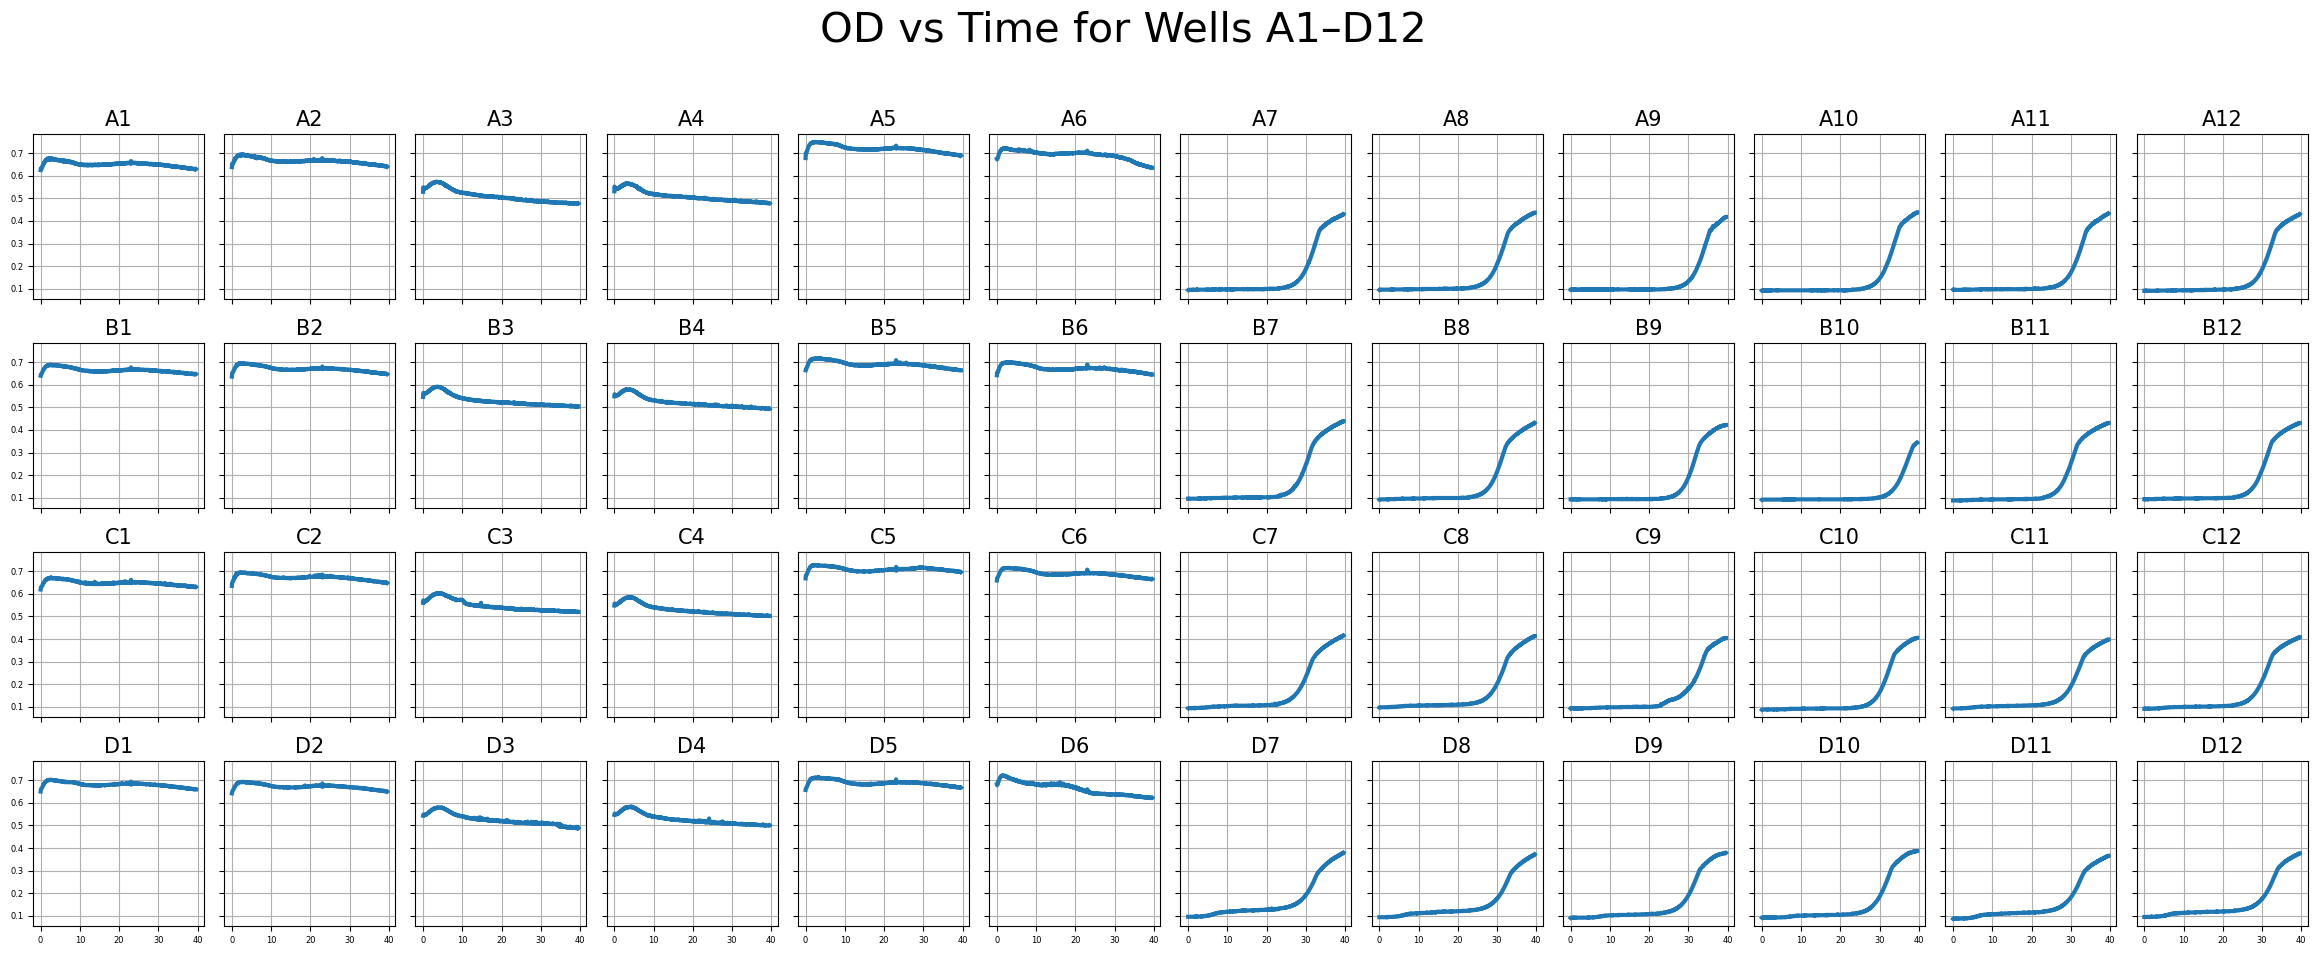

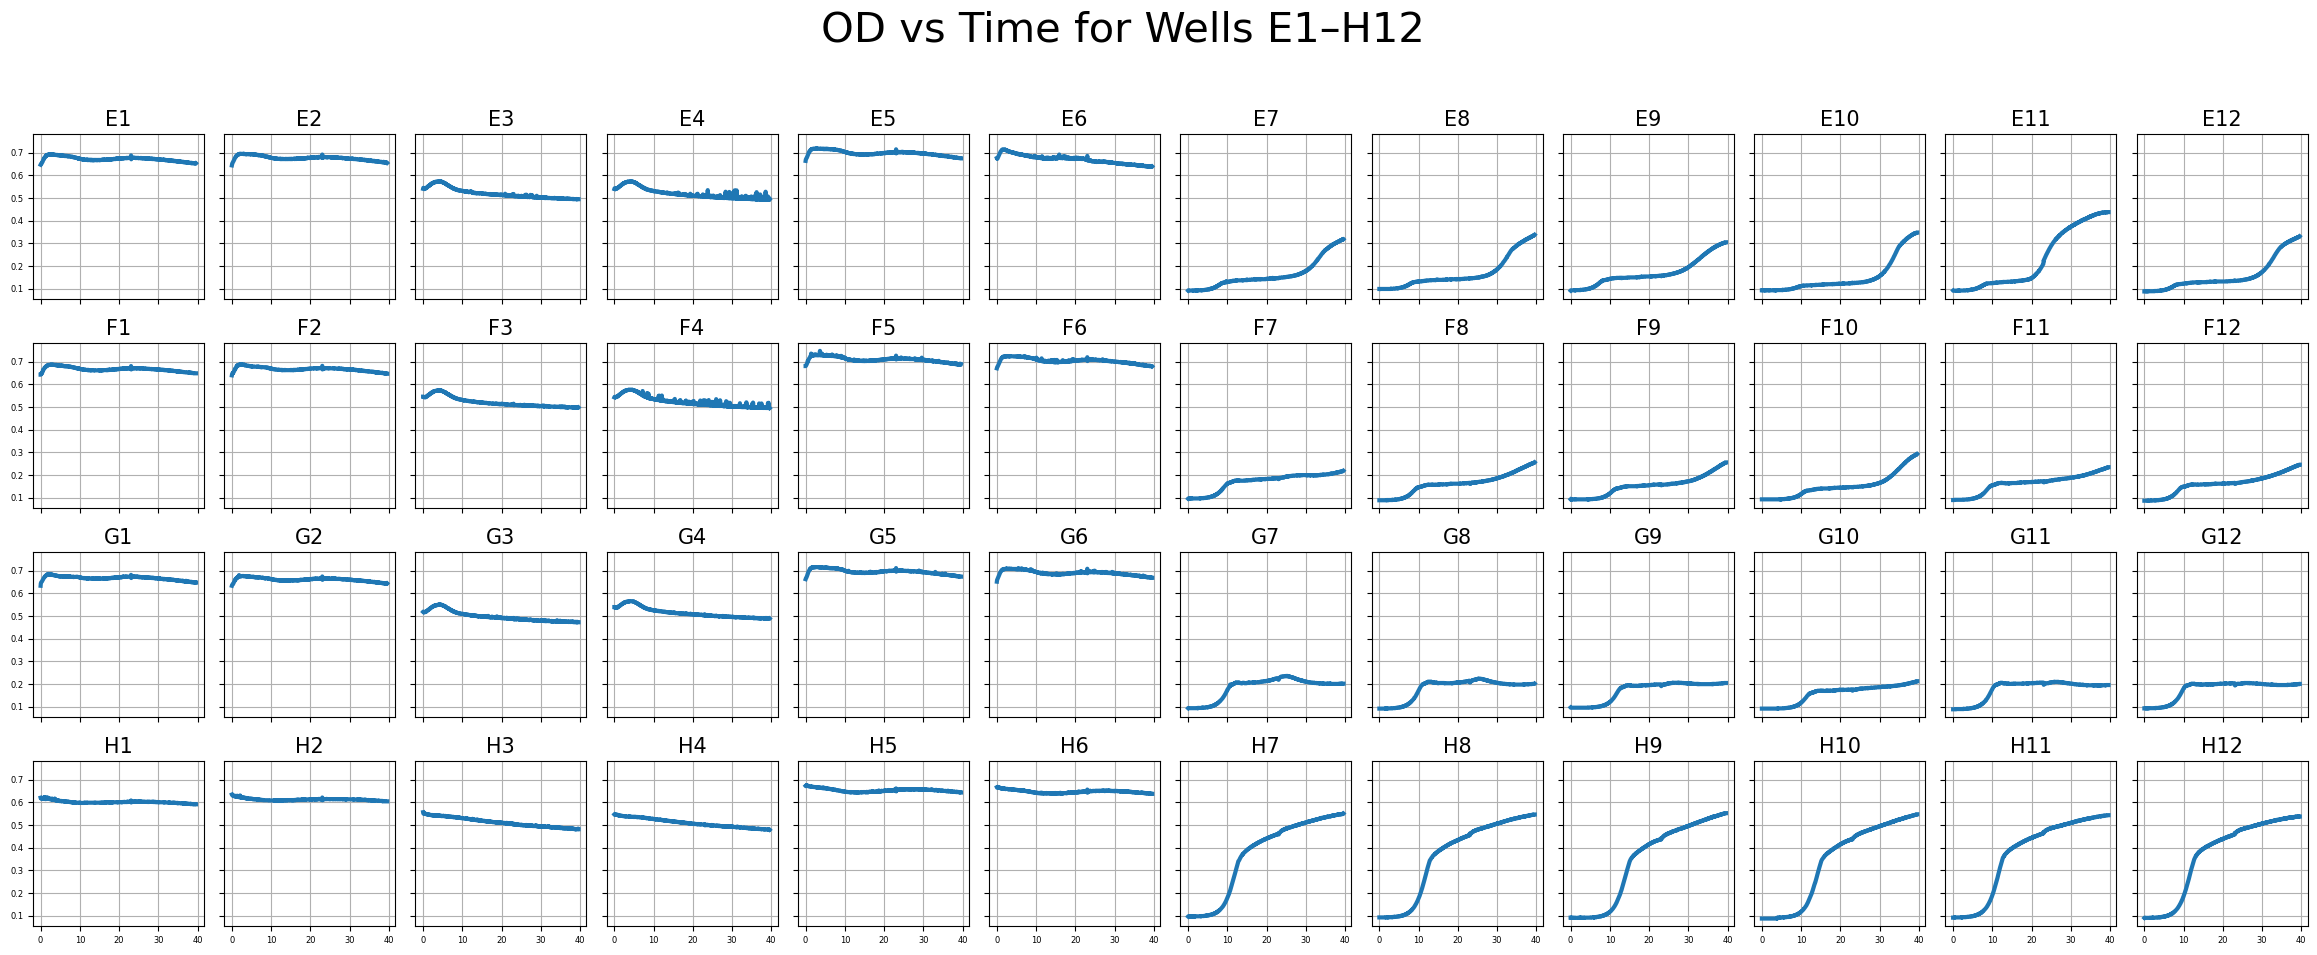

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bothfiles
df_22h = pd.read_csv('/Users/kyra/Desktop/G9 GTA - Sheet4.csv', skiprows=4)
df_46h = pd.read_csv('/Users/kyra/Desktop/G9 GTA - Sheet5.csv', skiprows=4)

#rename so that the file is continuous
for df in [df_22h, df_46h]:
    df.rename(columns={df.columns[0]: 'Reading', df.columns[1]: 'Time (s)'}, inplace=True)
    df['Time (s)'] = pd.to_numeric(df['Time (s)'], errors='coerce')
    df.dropna(subset=['Time (s)'], inplace=True)

#manual shift
if df_46h['Time (s)'].iloc[0] < df_22h['Time (s)'].iloc[-1]:
    time_offset = df_22h['Time (s)'].iloc[-1] + (df_22h['Time (s)'].iloc[1] - df_22h['Time (s)'].iloc[0])
    df_46h['Time (s)'] += time_offset

#merge
df_full = pd.concat([df_22h, df_46h], ignore_index=True)

#well ids
well_ids_cleaned = df_full.columns[2:].tolist()

#ensure they're numbers
for well in well_ids_cleaned:
    df_full[well] = pd.to_numeric(df_full[well], errors='coerce')

time_hours = df_full['Time (s)'] / 3600

#96well
rows = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
columns = list(range(1, 13))
well_labels = [f"{row}{col}" for row in rows for col in columns]

well_labels_first_half = well_labels[:48]  # A1 to D12
well_labels_second_half = well_labels[48:] # E1 to H12

well_ids_first_half = well_ids_cleaned[:48]  
well_ids_second_half = well_ids_cleaned[48:] 

fig1, axes1 = plt.subplots(4, 12, figsize=(24, 10), sharex=True, sharey=True)
axes1 = axes1.flatten()

for idx, well in enumerate(well_ids_first_half):
    ax = axes1[idx]
    ax.plot(time_hours, df_full[well], linewidth = 3)
    ax.set_title(well_labels_first_half[idx], fontsize=15)
    ax.grid(True)
    ax.tick_params(labelsize=6)

fig1.suptitle('OD vs Time for Wells A1–D12', fontsize=30)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.show()

fig2, axes2 = plt.subplots(4, 12, figsize=(24, 10), sharex=True, sharey=True)
axes2 = axes2.flatten()

for idx, well in enumerate(well_ids_second_half):
    ax = axes2[idx]
    ax.plot(time_hours, df_full[well], linewidth = 3)
    ax.set_title(well_labels_second_half[idx], fontsize=15)
    ax.grid(True)
    ax.tick_params(labelsize=6)

fig2.suptitle('OD vs Time for Wells E1–H12', fontsize=30)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.show()

time_hours = df_full['Time (s)'] / 3600

#yayyy generating 96 well plate ids
rows = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
columns = list(range(1, 13))
well_labels = [f"{row}{col}" for row in rows for col in columns]

#split labels into two halves
well_labels_first_half = well_labels[:48]  # A1 to D12
well_labels_second_half = well_labels[48:] # E1 to H12

#split well list into two halves
well_ids_first_half = well_ids_cleaned[:48]  
well_ids_second_half = well_ids_cleaned[48:] 

#first 4x12 subplot
fig1, axes1 = plt.subplots(4, 12, figsize=(24, 10), sharex=True, sharey=True)
axes1 = axes1.flatten()

for idx, well in enumerate(well_ids_first_half):
    ax = axes1[idx]
    ax.plot(time_hours, df_full[well], linewidth = 3)
    ax.set_title(well_labels_first_half[idx], fontsize=15)
    ax.grid(True)
    ax.tick_params(labelsize=6)

fig1.suptitle('OD vs Time for Wells A1–D12', fontsize=30)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.show()

#second 4x12 subplot (E–H rows)
fig2, axes2 = plt.subplots(4, 12, figsize=(24, 10), sharex=True, sharey=True)
axes2 = axes2.flatten()

for idx, well in enumerate(well_ids_second_half):
    ax = axes2[idx]
    ax.plot(time_hours, df_full[well], linewidth = 3)
    ax.set_title(well_labels_second_half[idx], fontsize=15)
    ax.grid(True)
    ax.tick_params(labelsize=6)

fig2.suptitle('OD vs Time for Wells E1–H12', fontsize=30)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.show()